## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members: 
- José Luis Manjon  presimanjon@yahoo.es        git @JoseLuisManjon
- Filipa Teles      filipa.teles@icloud.com     git 
- Mónica Villasuso  villasuso.monica@gmail.com  git @MVillasuso
_________________

Import de las librerías requeridas para el análisis

In [1]:
import pandas as pd 
import json 
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Carga de datos en un dataframe de la fuente a utilizar

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general

iso_code      continent       location        date  total_cases  \
0          ABW  North America          Aruba  2020-03-13          2.0   
1          ABW  North America          Aruba  2020-03-20          4.0   
2          ABW  North America          Aruba  2020-03-24         12.0   
3          ABW  North America          Aruba  2020-03-25         17.0   
4          ABW  North America          Aruba  2020-03-26         19.0   
...        ...            ...            ...         ...          ...   
35078      NaN            NaN  International  2020-02-28        705.0   
35079      NaN            NaN  International  2020-02-29        705.0   
35080      NaN            NaN  International  2020-03-01        705.0   
35081      NaN            NaN  International  2020-03-02        705.0   
35082      NaN            NaN  International  2020-03-10        696.0   

       new_cases  total_deaths  new_deaths  total_cases_per_million  \
0            2.0           0.0         0.0                   18.733   
1            2.0           0.0         0.0                   37.465   
2            8.0           0.0         0.0                  112.395   
3            5.0           0.0         0.0                  159.227   
4            2.0           0.0         0.0                  177.959   
...          ...           ...         ...                      ...   
35078        0.0           4.0         0.0                      NaN   
35079        0.0           6.0         2.0                      NaN   
35080        0.0           6.0         0.0                      NaN   
35081        0.0           6.0         0.0                      NaN   
35082       -9.0           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     18.733  ...          7.452       35973.781   
1                     18.733  ...          7.452       35973.781   
2                     74.930  ...          7.452       35973.781   
3                     46.831  ...          7.452       35973.781   
4                     18.733  ...          7.452       35973.781   
...                      ...  ...            ...             ...   
35078                    NaN  ...            NaN             NaN   
35079                    NaN  ...            NaN             NaN   
35080                    NaN  ...            NaN             NaN   
35081                    NaN  ...            NaN             NaN   
35082                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                    NaN                11.62   
1                  NaN                    NaN                11.62   
2                  NaN                    NaN                11.62   
3                  NaN                    NaN                11.62   
4                  NaN                    NaN                11.62   
...                ...                    ...                  ...   
35078              NaN                    NaN                  NaN   
35079              NaN                    NaN                  NaN   
35080              NaN                    NaN                  NaN   
35081              NaN                    NaN                  NaN   
35082              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                     NaN   
1                 NaN           NaN                     NaN   
2                 NaN           NaN                     NaN   
3                 NaN           NaN                     NaN   
4                 NaN           NaN                     NaN   
...               ...           ...                     ...   
35078             NaN           NaN                     NaN   
35079             NaN           NaN                     NaN   
35080             NaN           NaN                

Exploración de los datos del dataframe

In [3]:
covid_general.shape

(34663, 36)

In [4]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34663 entries, 0 to 34662
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         34599 non-null  object 
 1   continent                        34381 non-null  object 
 2   location                         34663 non-null  object 
 3   date                             34663 non-null  object 
 4   total_cases                      34322 non-null  float64
 5   new_cases                        34322 non-null  float64
 6   total_deaths                     34322 non-null  float64
 7   new_deaths                       34322 non-null  float64
 8   total_cases_per_million          34258 non-null  float64
 9   new_cases_per_million            34258 non-null  float64
 10  total_deaths_per_million         34258 non-null  float64
 11  new_deaths_per_million           34258 non-null  float64
 12  new_tests         

In [5]:
covid_general.index

RangeIndex(start=0, stop=34663, step=1)

In [6]:
# Revisión de los datos globales para ver si hay información totalizada (continent or country tienen valor  Null) y eliminarla posteriormente para el análisis
covid_general[(covid_general.continent.isnull()) | (covid_general.iso_code.isnull())]

iso_code continent       location        date  total_cases  new_cases  \
34381  OWID_WRL       NaN          World  2019-12-31         27.0       27.0   
34382  OWID_WRL       NaN          World  2020-01-01         27.0        0.0   
34383  OWID_WRL       NaN          World  2020-01-02         27.0        0.0   
34384  OWID_WRL       NaN          World  2020-01-03         44.0       17.0   
34385  OWID_WRL       NaN          World  2020-01-04         44.0        0.0   
...         ...       ...            ...         ...          ...        ...   
34658       NaN       NaN  International  2020-02-28        705.0        0.0   
34659       NaN       NaN  International  2020-02-29        705.0        0.0   
34660       NaN       NaN  International  2020-03-01        705.0        0.0   
34661       NaN       NaN  International  2020-03-02        705.0        0.0   
34662       NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
34381           0.0         0.0                    0.003   
34382           0.0         0.0                    0.003   
34383           0.0         0.0                    0.003   
34384           0.0         0.0                    0.006   
34385           0.0         0.0                    0.006   
...             ...         ...                      ...   
34658           4.0         0.0                      NaN   
34659           6.0         2.0                      NaN   
34660           6.0         0.0                      NaN   
34661           6.0         0.0                      NaN   
34662           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
34381                  0.003  ...          5.355       15469.207   
34382                  0.000  ...          5.355       15469.207   
34383                  0.000  ...          5.355       15469.207   
34384                  0.002  ...          5.355       15469.207   
34385                  0.000  ...          5.355       15469.207   
...                      ...  ...            ...             ...   
34658                    NaN  ...            NaN             NaN   
34659                    NaN  ...            NaN             NaN   
34660                    NaN  ...            NaN             NaN   
34661                    NaN  ...            NaN             NaN   
34662                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
34381             10.0                 233.07                 8.51   
34382             10.0                 233.07                 8.51   
34383             10.0                 233.07                 8.51   
34384             10.0                 233.07                 8.51   
34385             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
34658              NaN                    NaN                  NaN   
34659              NaN                    NaN                  NaN   
34660              NaN                    NaN                  NaN   
34661              NaN                    NaN                  NaN   
34662              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
34381           6.434        34.635                   60.13   
34382           6.434        34.635                   60.13   
34383           6.434        34.635                   60.13   
34384           6.434        34.635                   60.13   
34385           6.434        34.635                   60.13   
...               ...           ...                     ...   
34658             NaN           NaN                     NaN   
34659             NaN           NaN                     NaN   
34660             NaN           NaN                     NaN   
34661             NaN           NaN  

In [7]:
# DF Mundial sin los datos globales (continent is Nan) o de países Nan
world_df =  covid_general[~((covid_general.continent.isnull()) | (covid_general.iso_code.isnull()))]

In [8]:
world_df.shape

(34381, 36)

In [9]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34381 entries, 0 to 34380
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         34381 non-null  object 
 1   continent                        34381 non-null  object 
 2   location                         34381 non-null  object 
 3   date                             34381 non-null  object 
 4   total_cases                      34040 non-null  float64
 5   new_cases                        34040 non-null  float64
 6   total_deaths                     34040 non-null  float64
 7   new_deaths                       34040 non-null  float64
 8   total_cases_per_million          34040 non-null  float64
 9   new_cases_per_million            34040 non-null  float64
 10  total_deaths_per_million         34040 non-null  float64
 11  new_deaths_per_million           34040 non-null  float64
 12  new_tests         

In [10]:
world_df["date"]=pd.to_datetime(world_df["date"],format="%Y-%m-%d")

______________
## RANKING CON RESPECTO AL TOTAL
What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
______________

In [11]:
#Ranking diario por países considerando el numero de casos totales (i.e. Total Infected)
world_df["rank_TC"] = world_df.groupby(["date"])["total_cases"].rank(method = "dense", ascending = False)

In [12]:
#Ranking diario por países considerando el numero de muertes (i.e. Total Deaths)
world_df["rank_TD"] = world_df.groupby(["date"])["total_deaths"].rank(method = "dense", ascending = False)

In [13]:
#Ranking diario por países considerando el numero de casos totales por millon de habitantes (i.e. total_cases_per_million)
world_df["rank_TCxM"] = world_df.groupby(["date"])["total_cases_per_million"].rank(method = "dense", ascending = False)

In [14]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA EL DIA 28 DE MARZO
#world_df.iloc[world_df[world_df.date=="2020-03-28"]["rank_TC"].sort_values(ascending=True).index]

In [15]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA  ESPAñA
#world_df[world_df.iso_code=="ESP"]

In [16]:
cols_rank= ["rank_TC", "rank_TD", "rank_TCxM"]

## ANÁLISIS CONJUNTO PAISES DEL GRUPO D
### PORTUGAL, VENEZUELA, TURQUÍA, GRAN BRETAÑA y ESPAÑA

Filtro (en un dataframe) de los datos correspondientes a los países del grupo D

In [17]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD


iso_code      continent   location       date  total_cases  new_cases  \
9896       ESP         Europe      Spain 2019-12-31          0.0        0.0   
9897       ESP         Europe      Spain 2020-01-01          0.0        0.0   
9898       ESP         Europe      Spain 2020-01-02          0.0        0.0   
9899       ESP         Europe      Spain 2020-01-03          0.0        0.0   
9900       ESP         Europe      Spain 2020-01-04          0.0        0.0   
...        ...            ...        ...        ...          ...        ...   
33177      VEN  South America  Venezuela 2020-07-31      17859.0     1288.0   
33178      VEN  South America  Venezuela 2020-08-01      18574.0      715.0   
33179      VEN  South America  Venezuela 2020-08-02      19443.0      869.0   
33180      VEN  South America  Venezuela 2020-08-03      20206.0      763.0   
33181      VEN  South America  Venezuela 2020-08-04      20206.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
9896            0.0         0.0                    0.000   
9897            0.0         0.0                    0.000   
9898            0.0         0.0                    0.000   
9899            0.0         0.0                    0.000   
9900            0.0         0.0                    0.000   
...             ...         ...                      ...   
33177         158.0         7.0                  628.043   
33178         164.0         6.0                  653.187   
33179         169.0         5.0                  683.747   
33180         174.0         5.0                  710.580   
33181         174.0         0.0                  710.580   

       new_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
9896                   0.000  ...                 99.403                 7.17   
9897                   0.000  ...                 99.403                 7.17   
9898                   0.000  ...                 99.403                 7.17   
9899                   0.000  ...                 99.403                 7.17   
9900                   0.000  ...                 99.403                 7.17   
...                      ...  ...                    ...                  ...   
33177                 45.295  ...                204.850                 6.47   
33178                 25.144  ...                204.850                 6.47   
33179                 30.560  ...                204.850                 6.47   
33180                 26.832  ...                204.850                 6.47   
33181                  0.000  ...                204.850                 6.47   

       female_smokers  male_smokers  handwashing_facilities  \
9896             27.4          31.4                     NaN   
9897             27.4          31.4                     NaN   
9898             27.4          31.4                     NaN   
9899             27.4          31.4                     NaN   
9900             27.4          31.4                     NaN   
...               ...           ...                     ...   
33177             NaN           NaN                     NaN   
33178             NaN           NaN                     NaN   
33179             NaN           NaN                     NaN   
33180             NaN           NaN                     NaN   
33181             NaN           NaN                     NaN   

       hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  \
9896                         2.97            83.56      2.0      1.0   
9897                         2.97            83.56      2.0      1.0   
9898                         2.97            83.56      2.0      1.0   
9899                         2.97            83.56      2.0      1.0   
9900                         2.97            83.56      2.0      1.0   
...                           ...              ...      ...      ...   
33177                        0.80            72.06     66.0     82.0   
33178                        0

In [18]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 9896 to 33181
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         878 non-null    object        
 1   continent                        878 non-null    object        
 2   location                         878 non-null    object        
 3   date                             878 non-null    datetime64[ns]
 4   total_cases                      876 non-null    float64       
 5   new_cases                        876 non-null    float64       
 6   total_deaths                     876 non-null    float64       
 7   new_deaths                       876 non-null    float64       
 8   total_cases_per_million          876 non-null    float64       
 9   new_cases_per_million            876 non-null    float64       
 10  total_deaths_per_million         876 non-null    float64 

In [19]:
covid_grupoD["date"].min()

Timestamp('2019-12-31 00:00:00')

In [20]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar  datos de COVID
covid_grupoD[covid_grupoD["date"] == covid_grupoD["date"].min()]

iso_code continent        location       date  total_cases  new_cases  \
9896       ESP    Europe           Spain 2019-12-31          0.0        0.0   
11518      GBR    Europe  United Kingdom 2019-12-31          0.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
9896            0.0         0.0                      0.0   
11518           0.0         0.0                      0.0   

       new_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
9896                     0.0  ...                 99.403                 7.17   
11518                    0.0  ...                122.137                 4.28   

       female_smokers  male_smokers  handwashing_facilities  \
9896             27.4          31.4                     NaN   
11518            20.0          24.7                     NaN   

       hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  \
9896                         2.97            83.56      2.0      1.0   
11518                        2.54            81.32      2.0      1.0   

       rank_TCxM  
9896         2.0  
11518        2.0  

[2 rows x 39 columns]

In [21]:
covid_grupoD.new_cases.value_counts(dropna = False).sum()

878

In [22]:
# Crear un DF con las filas de datos que No contienen informacion del COVID
nocovid_grupoD = covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)]

In [23]:
nocovid_grupoD.shape

(64, 39)

In [24]:
# Eliminar del DF las filas que NO contienen info del COVID
covid_grupoD=covid_grupoD.drop(covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)].index)

In [25]:
covid_grupoD.shape

(814, 39)

In [26]:
# Verificar si hay alguna columna donde TODOS sus datos sean nulos
covid_grupoD.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          420
total_tests                        393
total_tests_per_thousand           393
new_tests_per_thousand             420
new_tests_smoothed                 318
new_tests_smoothed_per_thousand    318
tests_per_case                     320
positive_rate                      320
tests_units                        290
stringency_index                    26
population                           0
population_density                   0
median_age                           0
aged_65_older            

In [27]:
# Eliminar la columna handwashing_facilities pues no contiend informacion
covid_grupoD.drop(columns=["handwashing_facilities"], axis = 1, inplace=True)

In [28]:

covid_grupoD.groupby("iso_code")["date"].min()

iso_code
ESP   2020-02-01
GBR   2020-02-01
PRT   2020-03-01
TUR   2020-03-12
VEN   2020-03-15
Name: date, dtype: datetime64[ns]

In [29]:
covid_grupoD.reset_index(inplace=True)

In [30]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            814 non-null    int64         
 1   iso_code                         814 non-null    object        
 2   continent                        814 non-null    object        
 3   location                         814 non-null    object        
 4   date                             814 non-null    datetime64[ns]
 5   total_cases                      812 non-null    float64       
 6   new_cases                        812 non-null    float64       
 7   total_deaths                     812 non-null    float64       
 8   new_deaths                       812 non-null    float64       
 9   total_cases_per_million          812 non-null    float64       
 10  new_cases_per_million            812 non-null    float64      

In [31]:
# Creacion de un DF con las fechas del estado de alarma para cada país
alarm_dicc = {'iso_code': ["ESP", "PRT", "VEN", "GBR", "TUR"],
        'alarm_init': ['2020-03-14', '2020-03-13', '2020-03-13', '2020-03-23',np.NaN],
        'alarm_end': ['2020-06-21', '2020-06-01', '2020-07-11', '2020-07-04', np.NaN]
       }
alarm_dates = pd.DataFrame(alarm_dicc, columns = ['iso_code', 'alarm_init', 'alarm_end'])

alarm_dates

iso_code  alarm_init   alarm_end
0      ESP  2020-03-14  2020-06-21
1      PRT  2020-03-13  2020-06-01
2      VEN  2020-03-13  2020-07-11
3      GBR  2020-03-23  2020-07-04
4      TUR         NaN         NaN

# Show different tendencies for each column in your dataset

In [32]:
#Lista de las columnas de datos para graficarlas y contrastar la tendencia entre los países del grupo D
cols = list(covid_grupoD.columns.values[[5,6,7,8,9,10,11,12,13,14,15,16,17]])
cols

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed']

In [33]:
# Función para mostrar el valor de una columna de datos en un gráfico de líneas (1 por país)
def graf_grupo (x_val, y_val, hue_val, df, inv_y): 
    fig= plt.figure(figsize =(30,10))
    g = sns.relplot(x =x_val, y = y_val, hue = hue_val, kind = "line", data = df, palette = "Paired")
    g._legend.texts[0].set_text("")
    g._legend.set_title("Country")
    plt.xticks(rotation = "vertical")
    tit = y_val.upper() + " by Date and Country - Group D"
    plt.title(tit)
    plt.savefig("../resources/" + y_val+ "_x_C_D" +  ".png",bbox_inches='tight')
    if inv_y:
        plt.gca().invert_yaxis()
    plt.show()

<Figure size 2160x720 with 0 Axes>

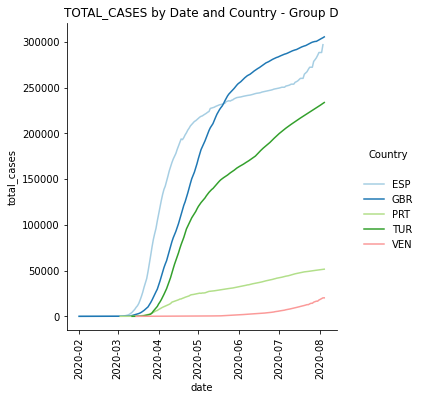

<Figure size 2160x720 with 0 Axes>

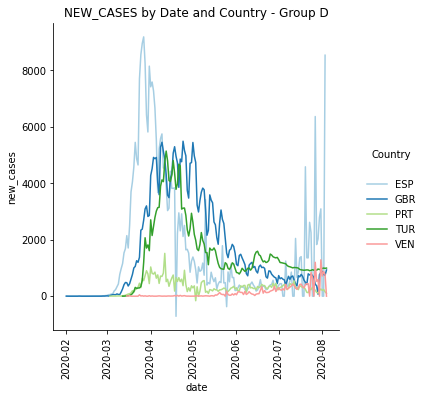

<Figure size 2160x720 with 0 Axes>

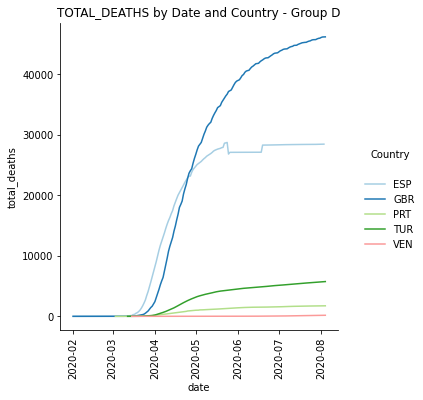

<Figure size 2160x720 with 0 Axes>

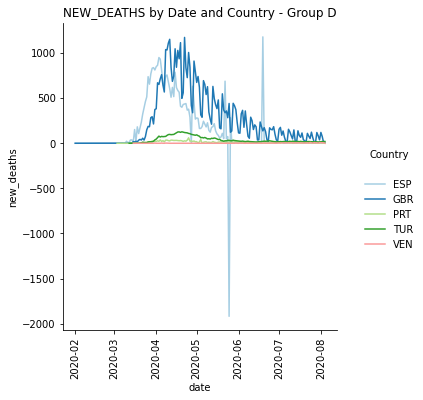

<Figure size 2160x720 with 0 Axes>

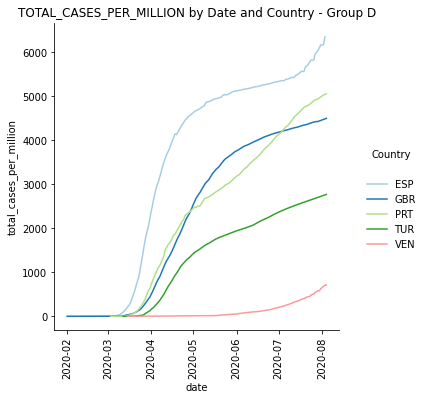

<Figure size 2160x720 with 0 Axes>

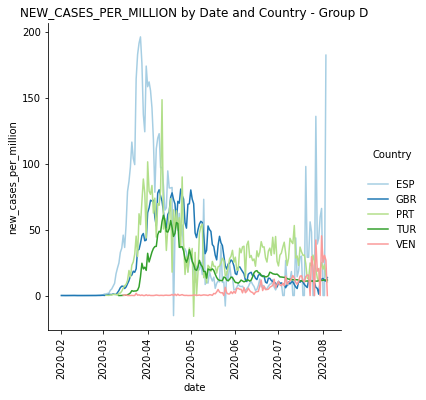

<Figure size 2160x720 with 0 Axes>

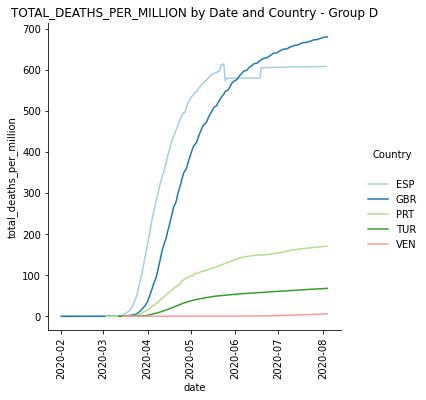

<Figure size 2160x720 with 0 Axes>

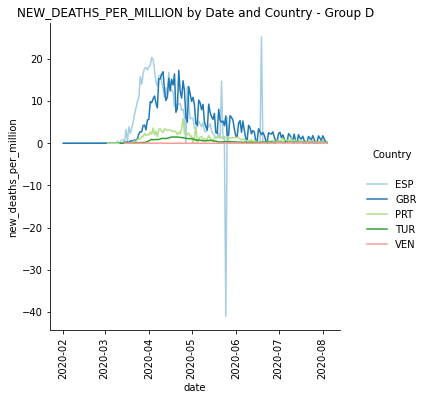

<Figure size 2160x720 with 0 Axes>

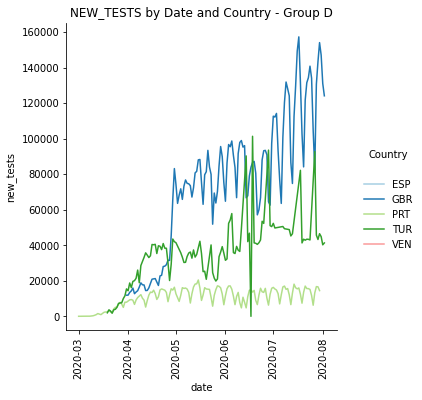

<Figure size 2160x720 with 0 Axes>

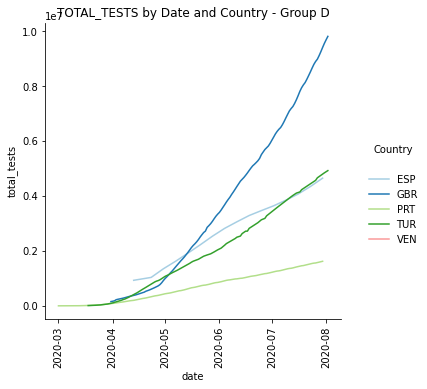

<Figure size 2160x720 with 0 Axes>

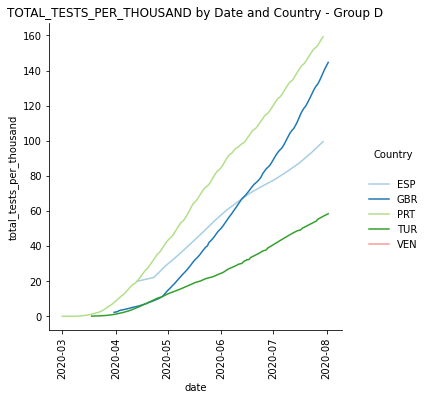

<Figure size 2160x720 with 0 Axes>

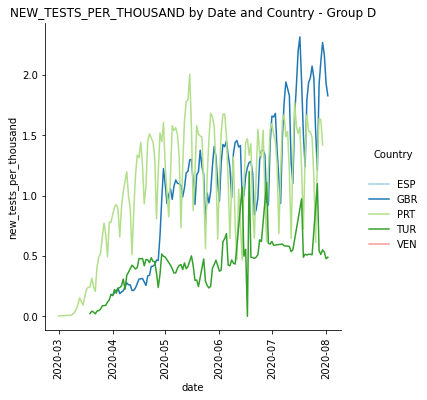

<Figure size 2160x720 with 0 Axes>

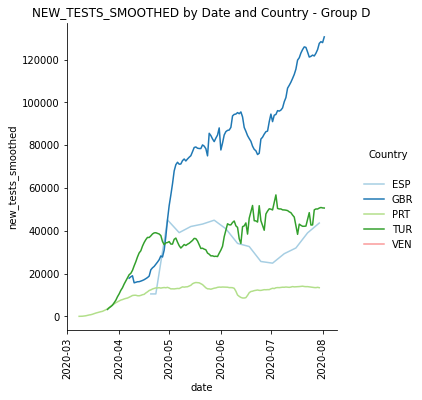

In [34]:
for elem in cols:
    graf_grupo("date" , elem , "iso_code", covid_grupoD, False )

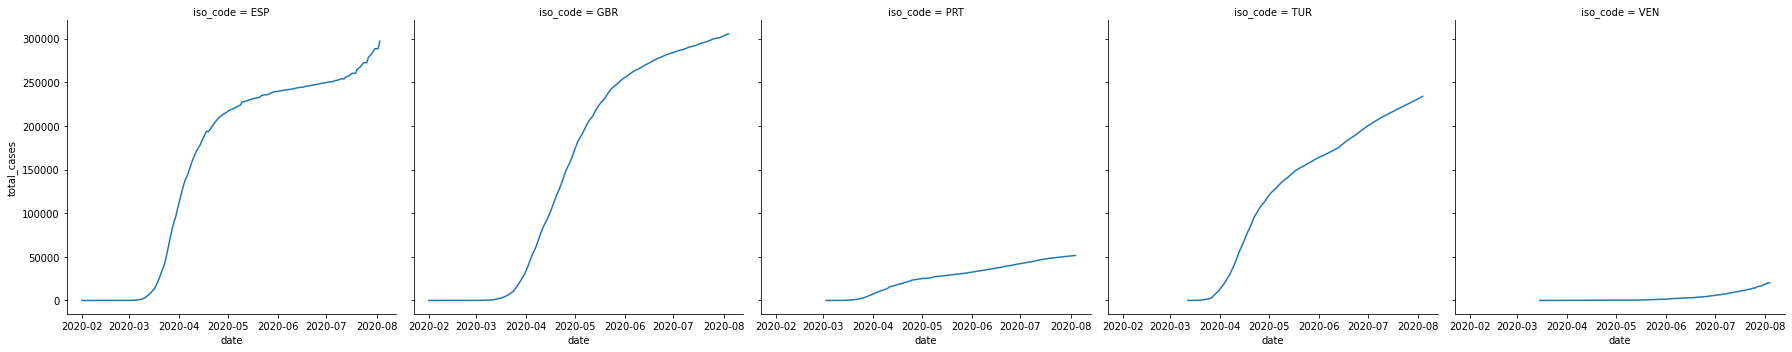

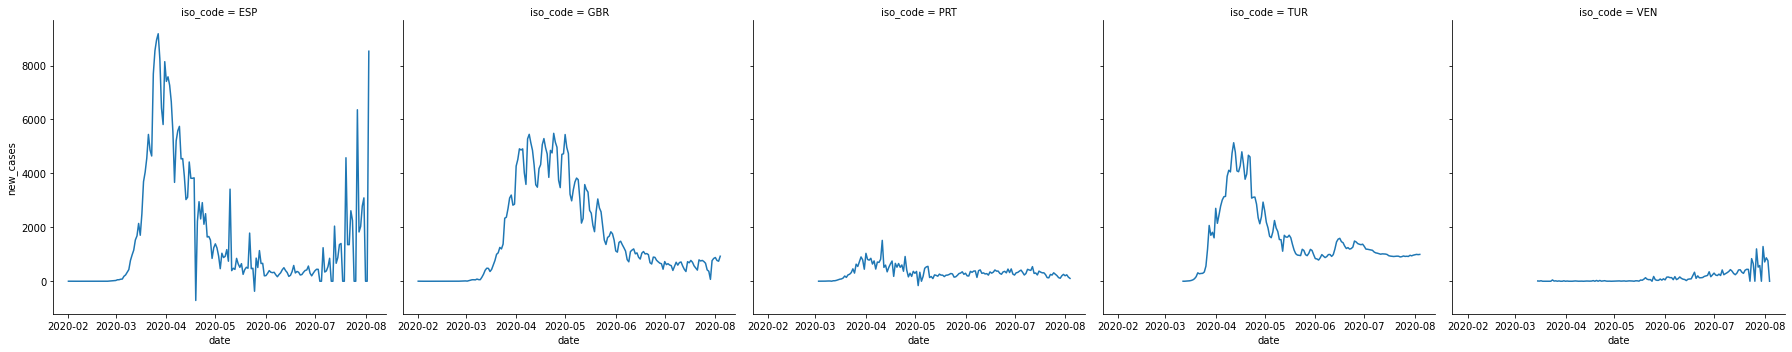

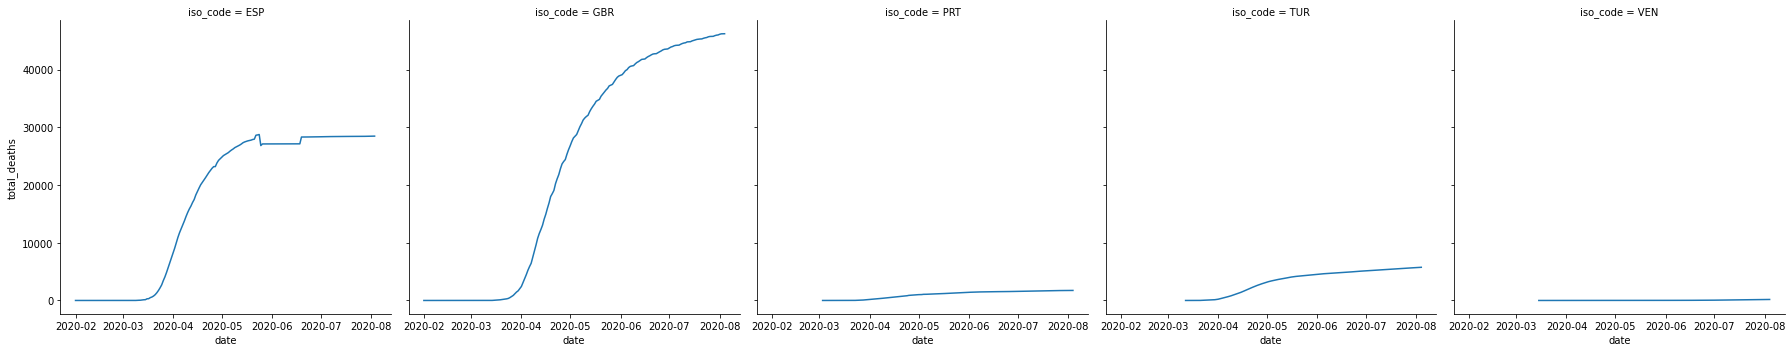

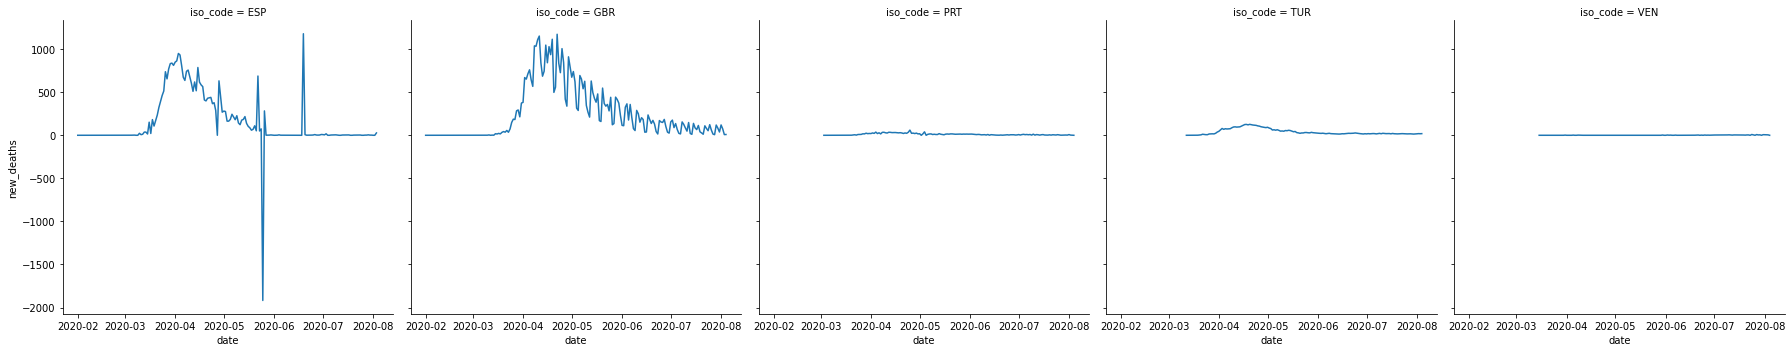

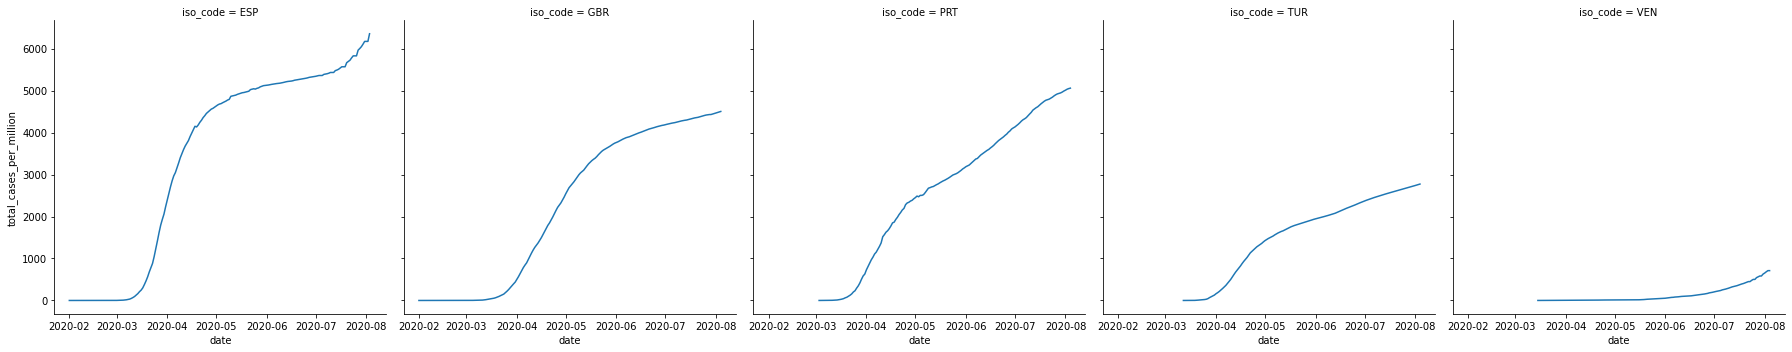

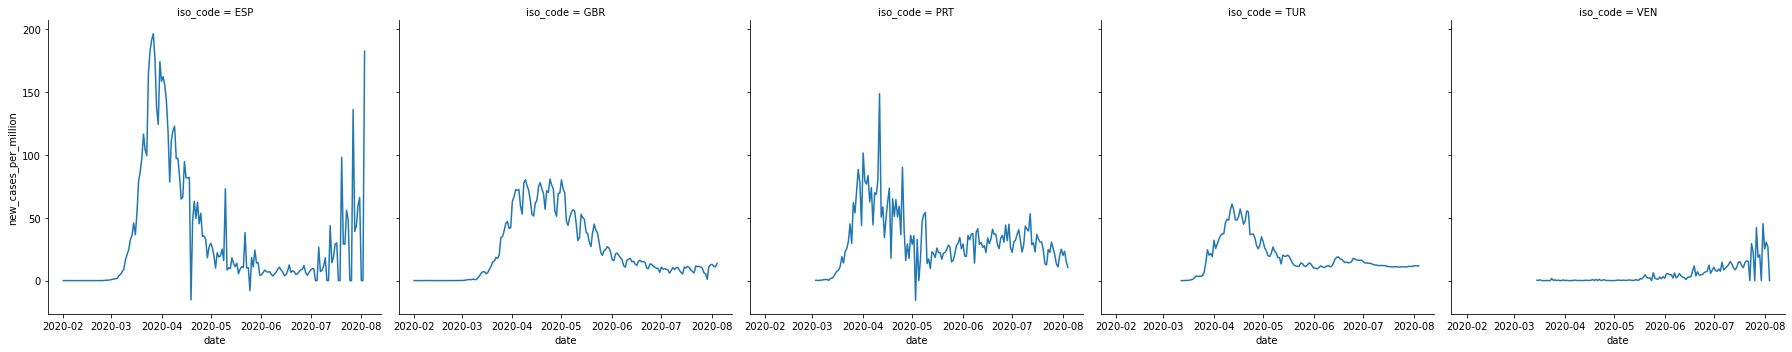

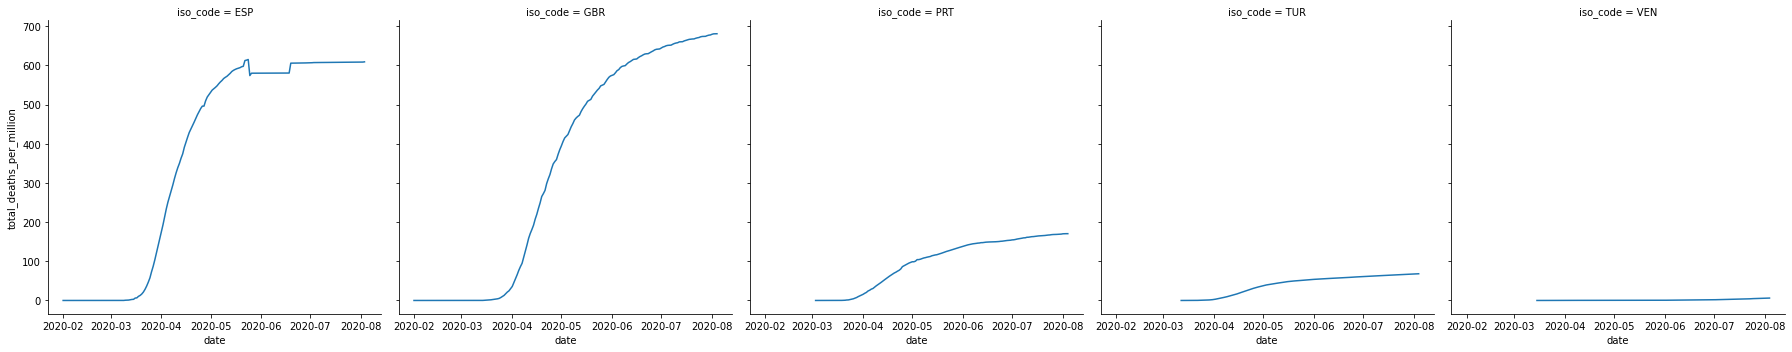

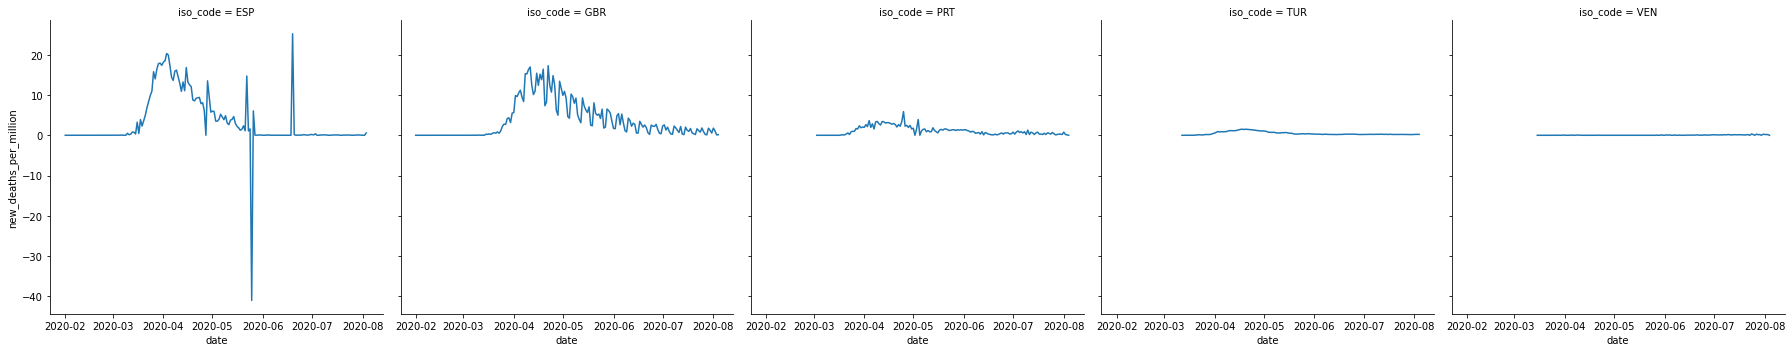

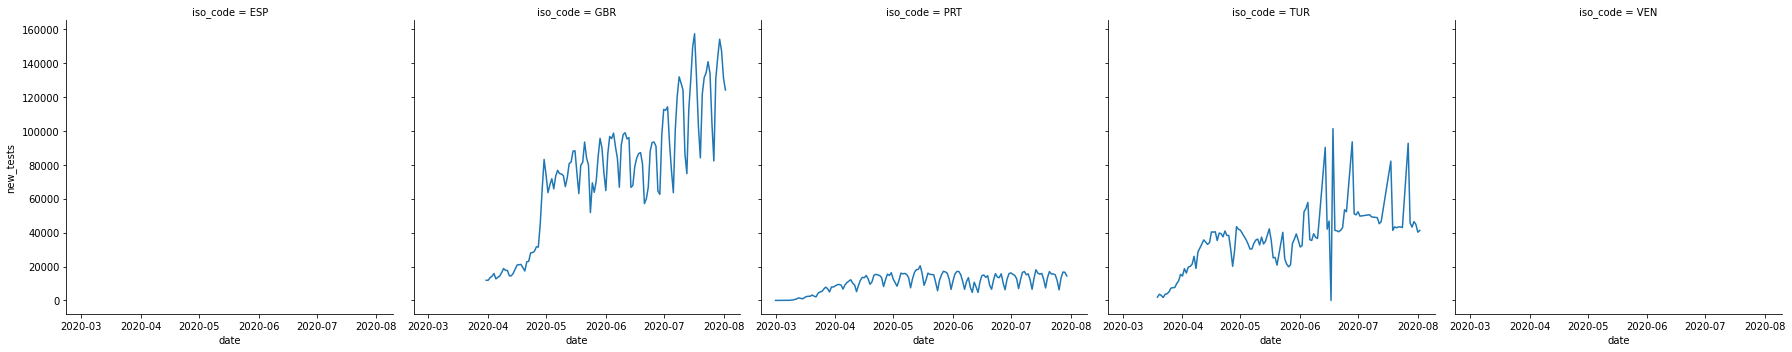

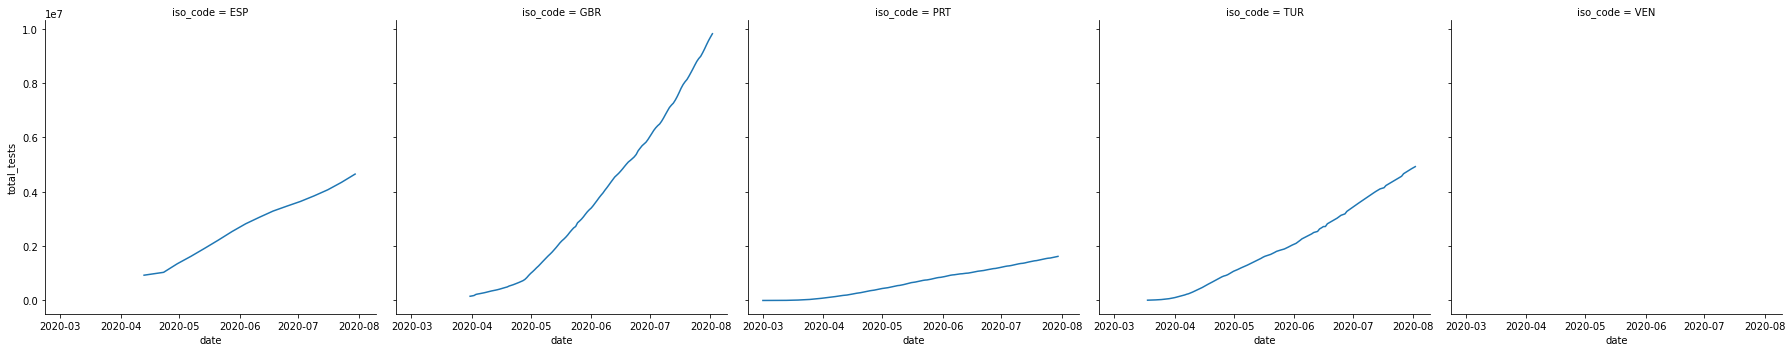

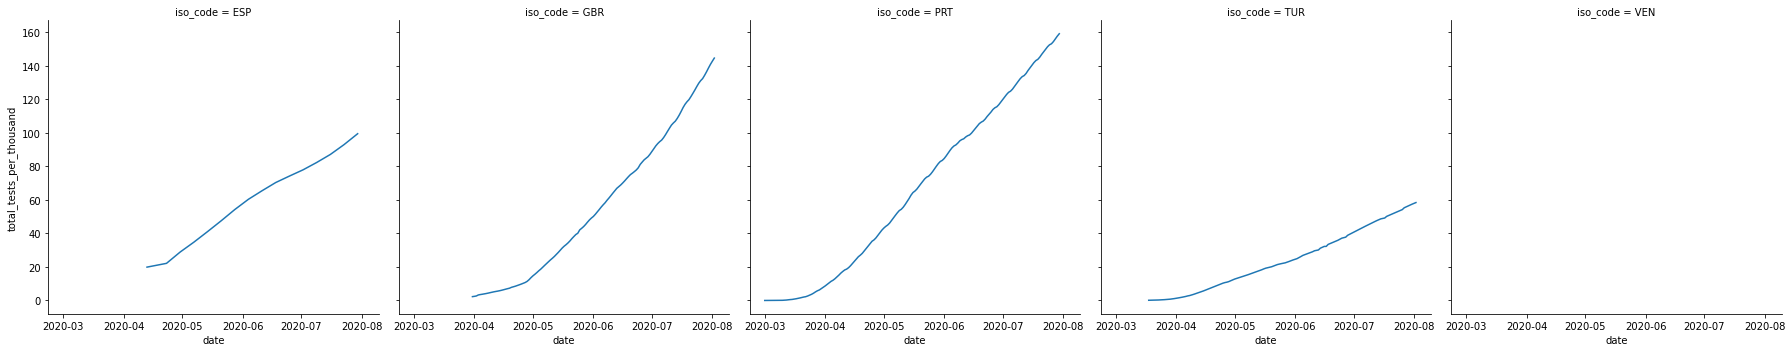

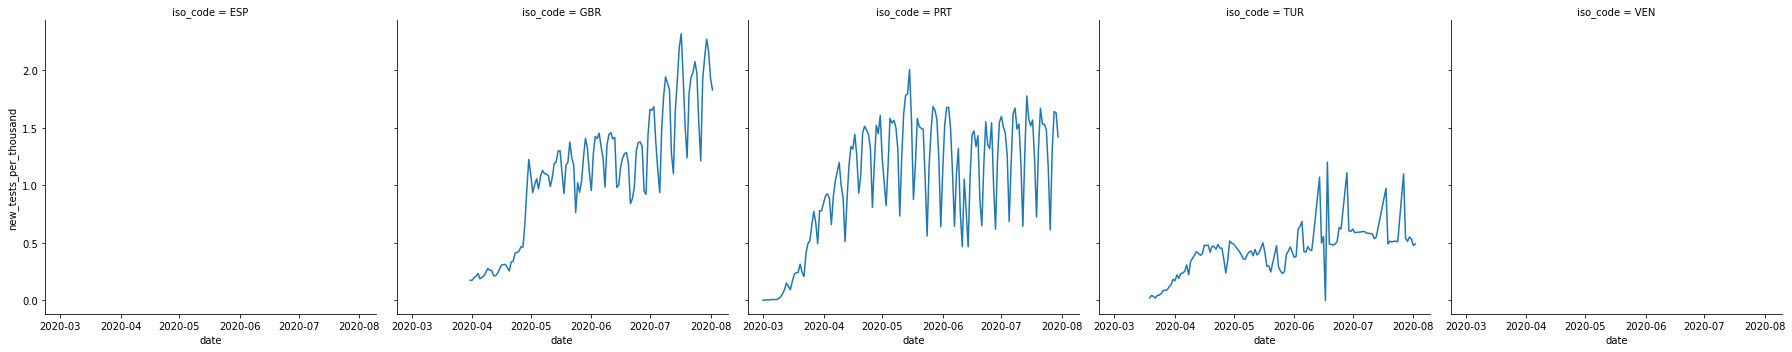

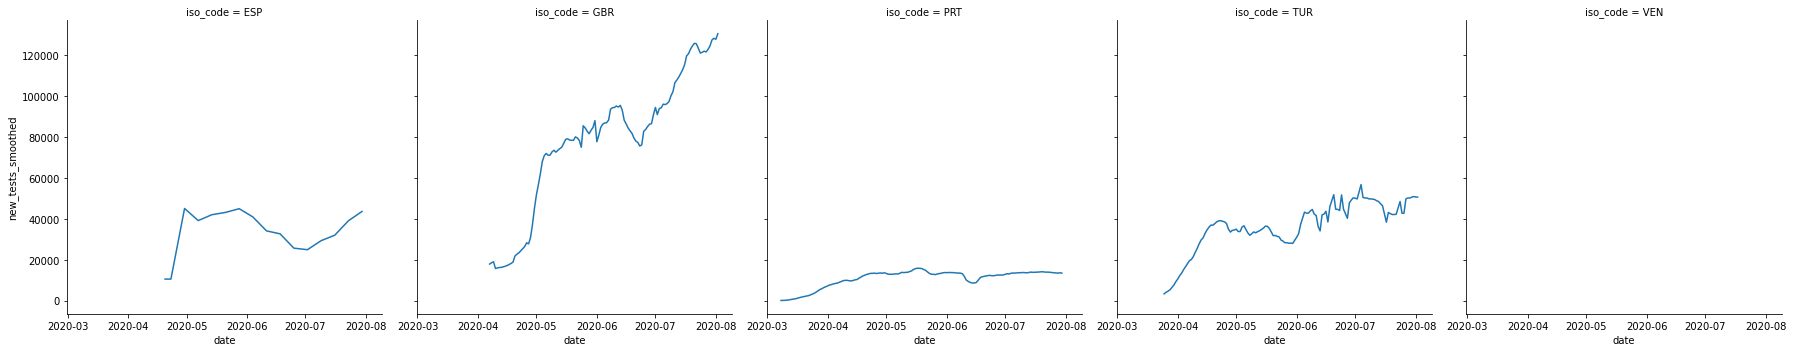

In [35]:
#Gráficos de cada variable separados por país
for elem in cols:
    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=covid_grupoD)

______________
## ANÁLISIS DETALLADO POR PAÍS
Show different tendencies for each column in your dataset. Show, vertically, thestart date and end date of the alarm state in each plot
______________

### MUERTES TOTALES Y CASOS TOTALES DE CADA PAÍS (CONTRASTADOS CON FECHAS DE ESTADO DE ALARMA)

In [38]:
def graf_pais (ccode,col_dat, cname,cdf, y_maximo):
    if y_maximo:
        eje_y = cdf.total_cases.max()
        tit = cname.upper() + " COVID19 - TOTALES"
        filen= "Tot_"
    else:
        eje_y = cdf.rank_TCxM.max()
        tit = cname.upper() + " COVID19 - RANKING"
        filen= "Rank_"
    fg = cdf.plot(x="date", y= col_dat, kind="line", figsize=(12,8),title= tit)
    fg.legend(bbox_to_anchor=(1.2, 0.5))
    plt.vlines(alarm_dates.alarm_init[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.vlines(alarm_dates.alarm_end[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.savefig("../resources/"+ filen + elem+".png",bbox_inches='tight')
    plt.show()

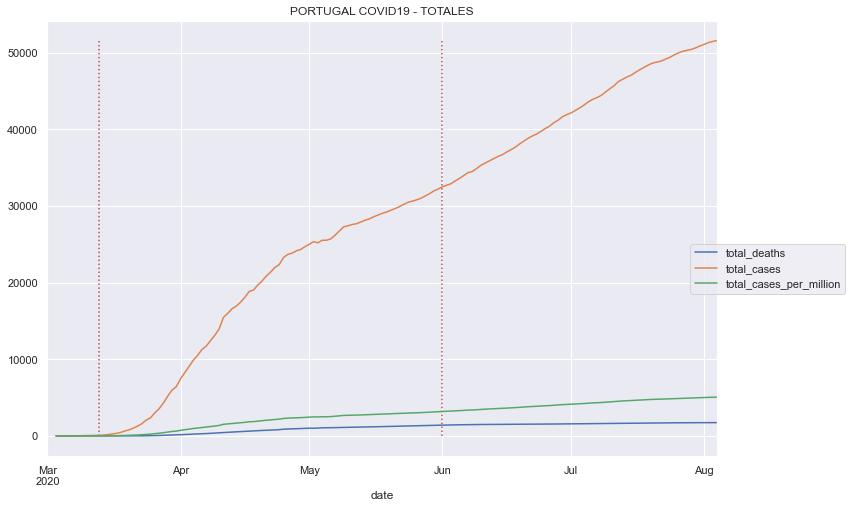

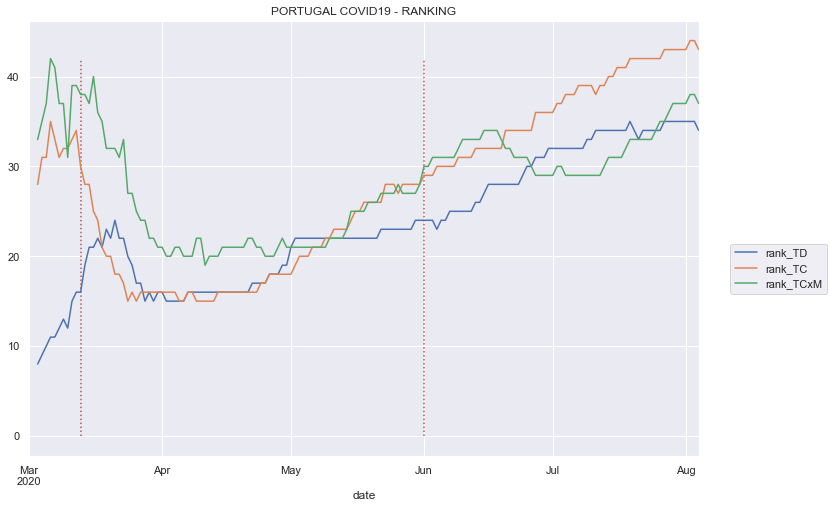

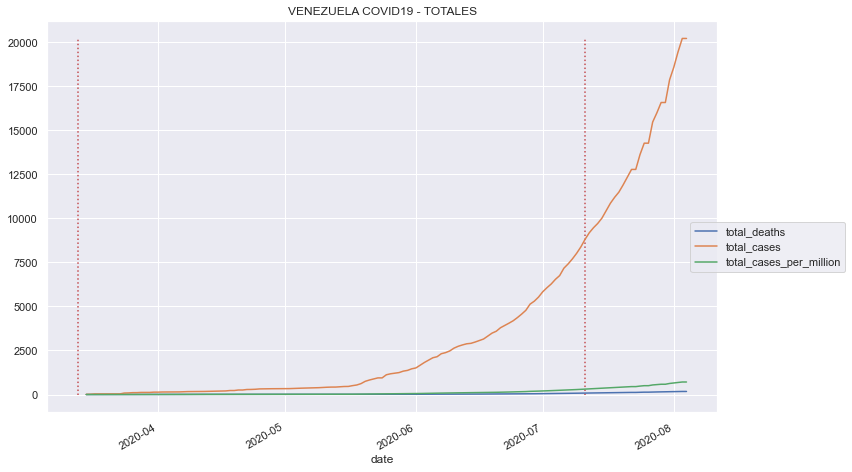

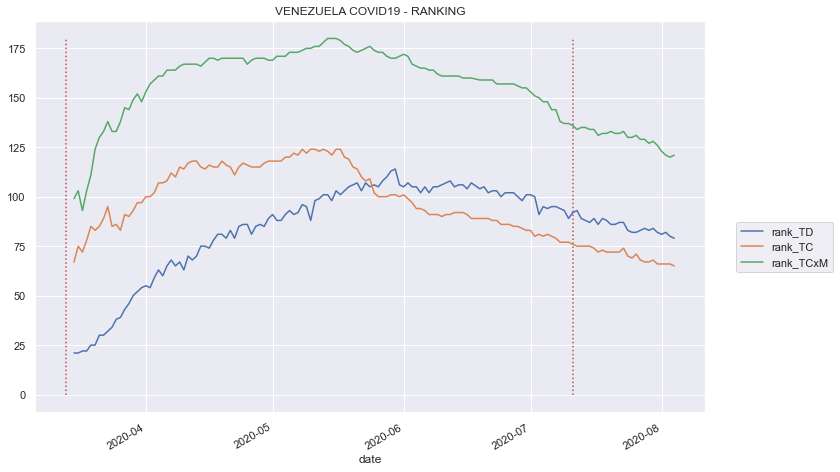

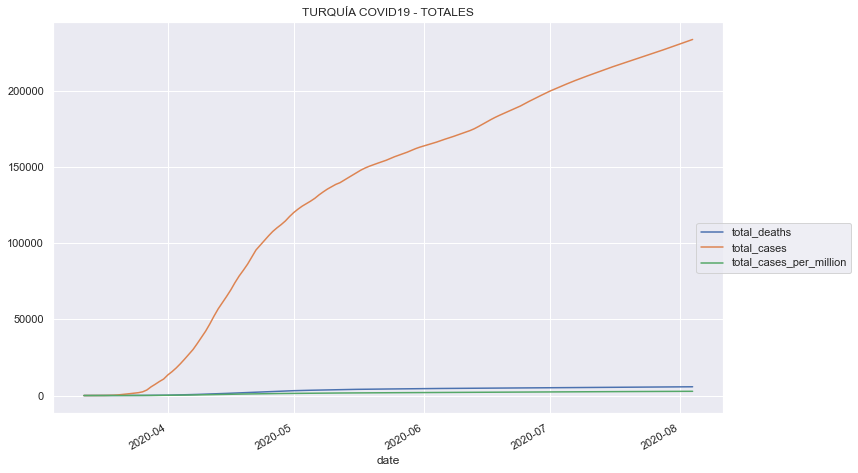

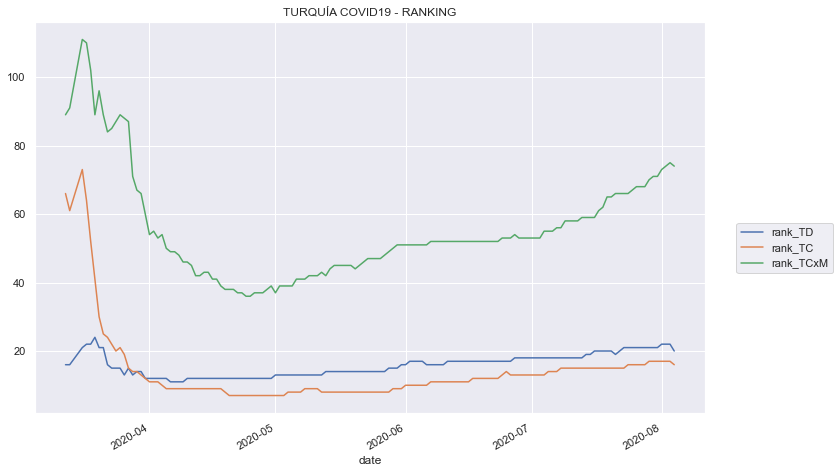

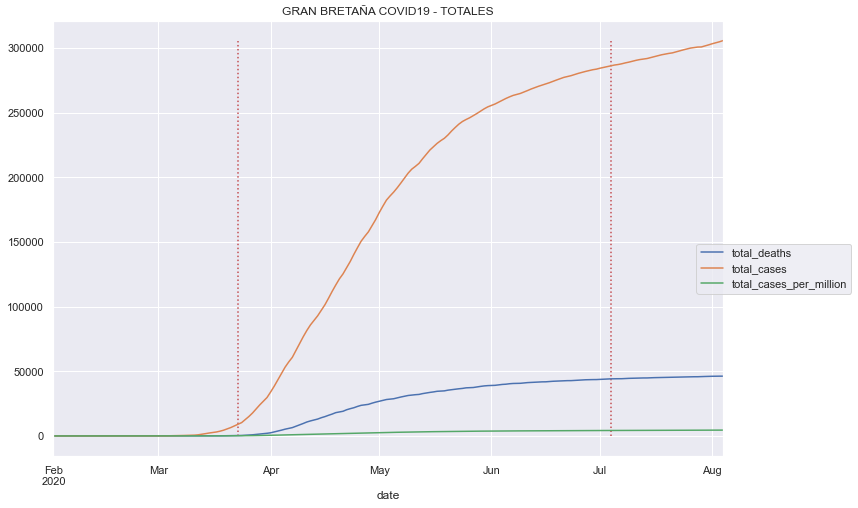

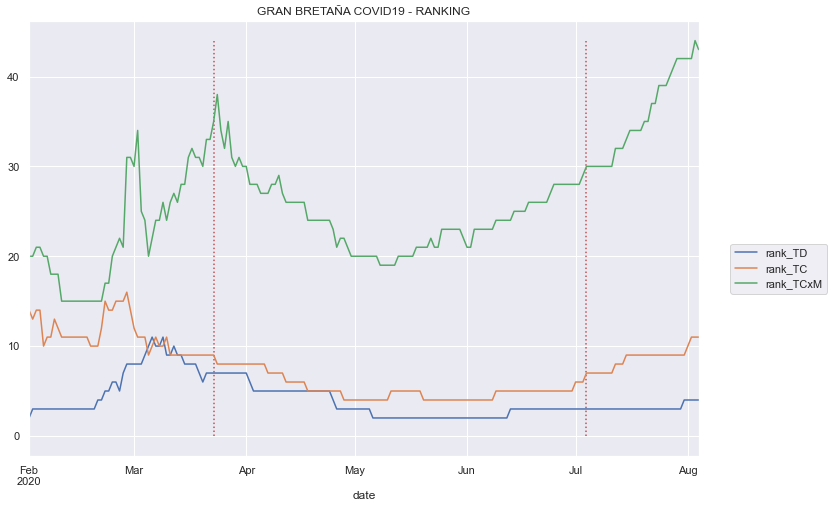

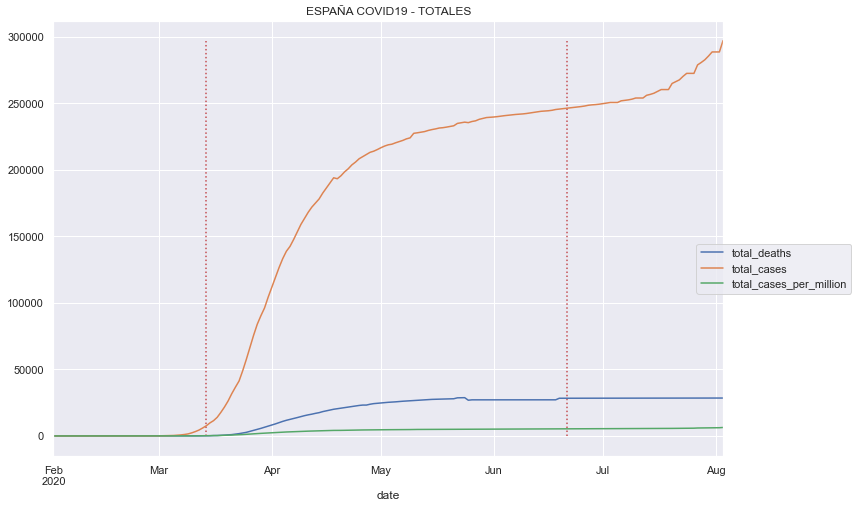

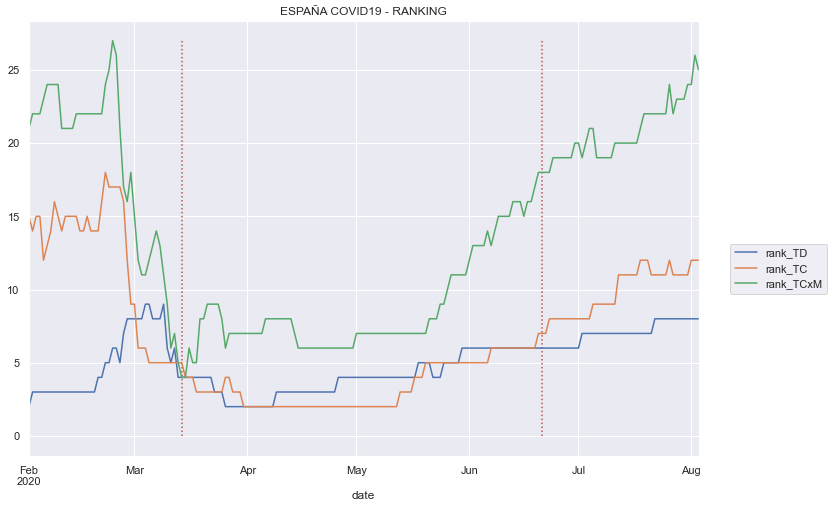

In [39]:
sns.set()
col_dat1 = ["total_deaths", "total_cases", "total_cases_per_million"]
col_dat2 = [ "rank_TD", "rank_TC", "rank_TCxM"]
for elem in paises_grupoD:
    df = covid_grupoD[covid_grupoD.iso_code==elem]
    graf_pais(elem, col_dat1, paises_nombres[elem], df, True)
    graf_pais(elem, col_dat2, paises_nombres[elem], df, False)
  


In [40]:
#Dataframe con información resumida de datos referenciales por país
datos_paises = covid_grupoD.iloc[:,[1,20,21,22,23,24,29,30,32,33]].drop_duplicates()

In [41]:
datos_paises.info()
# Nota: 
# Stringency Index: The Government Response Stringency Index is a composite measure based on nine response indicators including
# school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 813
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               339 non-null    object 
 1   positive_rate          301 non-null    float64
 2   tests_units            308 non-null    object 
 3   stringency_index       328 non-null    float64
 4   population             339 non-null    float64
 5   population_density     339 non-null    float64
 6   extreme_poverty        330 non-null    float64
 7   cardiovasc_death_rate  339 non-null    float64
 8   female_smokers         330 non-null    float64
 9   male_smokers           330 non-null    float64
dtypes: float64(8), object(2)
memory usage: 29.1+ KB


In [42]:
datos_paises

iso_code  positive_rate tests_units  stringency_index  population  \
0        ESP            NaN         NaN             11.11  46754783.0   
37       ESP            NaN         NaN             25.00  46754783.0   
38       ESP            NaN         NaN             45.83  46754783.0   
42       ESP            NaN         NaN             67.13  46754783.0   
44       ESP            NaN         NaN             68.98  46754783.0   
..       ...            ...         ...               ...         ...   
731      VEN            NaN         NaN             85.19  28435943.0   
751      VEN            NaN         NaN             81.48  28435943.0   
770      VEN            NaN         NaN             87.04  28435943.0   
800      VEN            NaN         NaN             86.11  28435943.0   
813      VEN            NaN         NaN               NaN  28435943.0   

     population_density  extreme_poverty  cardiovasc_death_rate  \
0                93.105              1.0                 99.403   
37               93.105              1.0                 99.403   
38               93.105              1.0                 99.403   
42               93.105              1.0                 99.403   
44               93.105              1.0                 99.403   
..                  ...              ...                    ...   
731              36.253              NaN                204.850   
751              36.253              NaN                204.850   
770              36.253              NaN                204.850   
800              36.253              NaN                204.850   
813              36.253              NaN                204.850   

     female_smokers  male_smokers  
0              27.4          31.4  
37             27.4          31.4  
38             27.4          31.4  
42             27.4          31.4  
44             27.4          31.4  
..              ...           ...  
731             NaN           NaN  
751             NaN           NaN  
770             NaN           NaN  
800             NaN           NaN  
813             NaN           NaN  

[339 rows x 10 columns]

_________
## CORRELACIÓN
______________

In [43]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            814 non-null    int64         
 1   iso_code                         814 non-null    object        
 2   continent                        814 non-null    object        
 3   location                         814 non-null    object        
 4   date                             814 non-null    datetime64[ns]
 5   total_cases                      812 non-null    float64       
 6   new_cases                        812 non-null    float64       
 7   total_deaths                     812 non-null    float64       
 8   new_deaths                       812 non-null    float64       
 9   total_cases_per_million          812 non-null    float64       
 10  new_cases_per_million            812 non-null    float64      

In [44]:
#Matriz de correlación entre variables
grupoD_corr = covid_grupoD.iloc[:,np.r_[1,5,7,9,22:36]]     #Un subconjunto de las variables a contrastar

In [45]:
grupoD_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    814 non-null    object 
 1   total_cases                 812 non-null    float64
 2   total_deaths                812 non-null    float64
 3   total_cases_per_million     812 non-null    float64
 4   stringency_index            788 non-null    float64
 5   population                  814 non-null    float64
 6   population_density          814 non-null    float64
 7   median_age                  814 non-null    float64
 8   aged_65_older               814 non-null    float64
 9   aged_70_older               814 non-null    float64
 10  gdp_per_capita              814 non-null    float64
 11  extreme_poverty             672 non-null    float64
 12  cardiovasc_death_rate       814 non-null    float64
 13  diabetes_prevalence         814 non

In [46]:
grupoD_corr.shape

(814, 18)

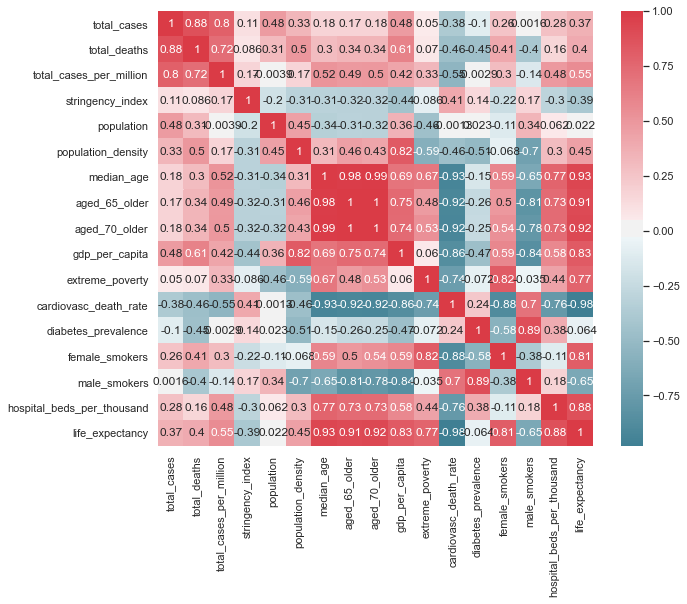

In [47]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = grupoD_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### NOTA:Otras pruebas. No considerar este código

In [ ]:
#Dejar únicamente las columnas que interesan para la evaluación del ranking
#world_df = world_df[["iso_code", "continent", "location", "date", "total_cases", "total_deaths", "total_cases_per_million", "stringency_index", "population", "population_density","hospital_beds_per_thousand", "life_expectancy" ]]

In [ ]:
#Crea un DF por cada país (llamado covid_ESP, etc) a partir de los datos del dataframe covid_grupoD. 
#for elem in paises_grupoD:
#    df_name = "covid_" + elem
#    globals()[df_name] = covid_grupoD[covid_grupoD.iso_code==elem]

In [ ]:
#for elem in cols_rank:
#    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=rank_grupoD)